In [1]:
import numpy as np

from qiskit import IBMQ, Aer
from qiskit import QuantumCircuit, assemble

from qiskit.visualization import plot_histogram

### Constant Oracle

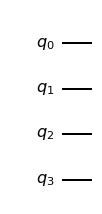

In [4]:
#define input length
n = 3

const_oracle = QuantumCircuit(n+1)

output = np.random.randint(2)
if output == 1:
    const_oracle.x(n)
    
z = const_oracle.draw()

### Balanced Oracle

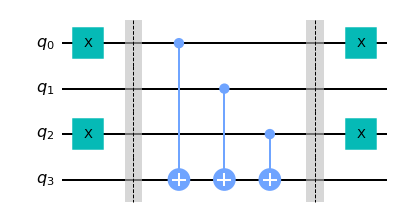

In [5]:
balanced_oracle = QuantumCircuit(n+1)
controls = "101"

#X-gates
for qubit in range(len(controls)):
    if controls[qubit] == '1':
        balanced_oracle.x(qubit)
            
balanced_oracle.barrier()

#Controlled-Not gates
for qubit in range(n):
    balanced_oracle.cx(qubit, n)

balanced_oracle.barrier()

#X-gates
for qubit in range(len(controls)):
    if controls[qubit] == '1':
        balanced_oracle.x(qubit)  

z = balanced_oracle.draw()

### Full Algorithm

/tmp/ipykernel_10375/1622228698.py:12: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  dj_circuit += balanced_oracle
/home/alessandro/.local/lib/python3.9/site-packages/qiskit/circuit/quantumcircuit.py:876: DeprecationWarning: The QuantumCircuit.extend() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  return self.extend(rhs)


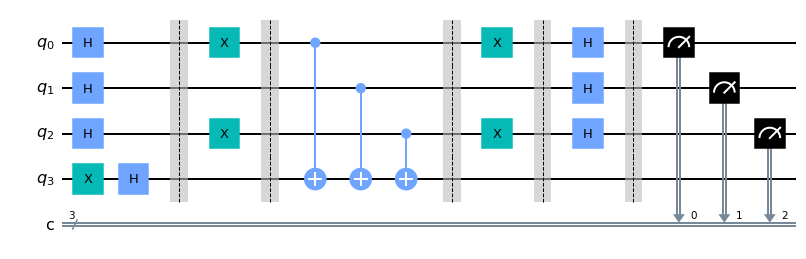

In [6]:
dj_circuit = QuantumCircuit(n+1, n)

#H-gates
for qubit in range(n):
    dj_circuit.h(qubit)
    
#Put last qubit in state |->
dj_circuit.x(n)
dj_circuit.h(n)

dj_circuit.barrier()
dj_circuit += balanced_oracle
dj_circuit.barrier()

#Repeat H-gates
for qubit in range(n):
    dj_circuit.h(qubit)
dj_circuit.barrier()

#Measure
for c in range(n):
    dj_circuit.measure(c,c)


z = dj_circuit.draw()

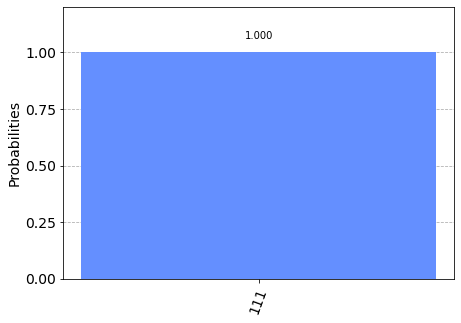

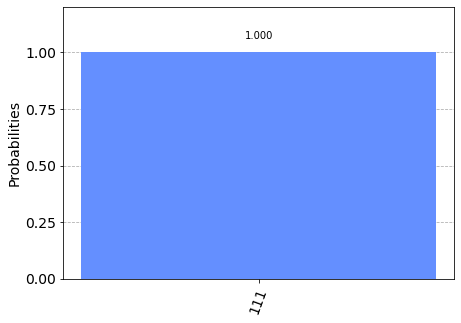

In [7]:
# use local simulator
qasm_sim = Aer.get_backend('qasm_simulator')
shots = 1024
qobj = assemble(dj_circuit, qasm_sim)
results = qasm_sim.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer)